## Least Squares
Source: Professor Park's notes
### Settings/Notation
* $m \in \mathbb{Z}^+$ - number of observations/equations
* $n \in \mathbb{Z}^+$ - number of parameters/unknowns
* $A \in \mathbb{R}^{mxn}$ - full rank matrix with $m >> n$ (tall matrix)
* $b \in \mathbb{R}^m, \ x \in \mathbb{R}^n$
* $||x|| = ||x||_2 = \sqrt{x_1^2 + \dots + x_n^2}$ (2-norm)

### Fitting Data by Least Square
1. Choose a model $\rightarrow$ dimension and meaning of x
2. Force the model to fit the data $\rightarrow Ax = b$
3. Solve the normal equation $\rightarrow$ compute $x$ such that $A^TAx = A^Tb$ 
4. Diagnostics $\rightarrow$ plots and statistics

### Diagnostics
* residual: $r = b - A\bar{x} = (r_1, \dots, r_m)$
* squared error (SE): $r_1^2 + \dots + r_m^2$
* mean squared error (MSE):  $\text{SE}/m = \left(r_1^2 + \dots + r_m^2\right)/m$
* root mean squared error (RMSE):  $\sqrt{MSE} = \sqrt{\left(r_1^2 + \dots + r_m^2\right)/m} \\$
Note: the diagnostics are based off of backwards error ($b-A\bar{x}$) since there is not true solution to the initial system

### Example
Find the "best" solution to $\\$
$\begin{array}{lcl} x_1 + x_2 = 2 \\ x_1 - x_2 = 1 \\ x_1 + x_2 = 3\end{array} \iff \begin{bmatrix} 1 & 1 \\ 1 & -1 \\ 1 & 1 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 2 \\ 1 \\3 \end{bmatrix}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# System of linear equations
A = np.array([[1, 1], [1, -1], [1, 1]], dtype=np.float64)
b = np.array([2, 1, 3], dtype=np.float64)

# naively try to solve the system
# x = np.linalg.solve(A, b)

# solve normal equation
x = np.linalg.solve(A.T @ A, A.T @ b)

print(f"{'x':<10}{': '}{x}")
print(f"{'residual':<10}{': '}{b - A @ x}")
print(f"Dot prodoct of col1 and residual: {A[:,0].T @ (b - A @ x)}")
print(f"Dot prodoct of col2 and residual: {A[:,1].T @ (b - A @ x)}")

In [3]:
# data points
data = np.array([[-1, 1], [0, 0], [1,0], [2, -2]], dtype=np.float64)

# number of data points/observations
m = data.shape[0]

# vector of unknowns (model 1)
n = 2
c = np.zeros(n)

# matrix of least squares (model 1)
A = np.zeros((m, n))
ones = np.ones(m)
A = np.column_stack((ones, data[:, 0]))

# vector of observations
b = data[:, 1]

# least squares solution (model 1)
c = np.linalg.solve(A.T @ A, A.T @ b)

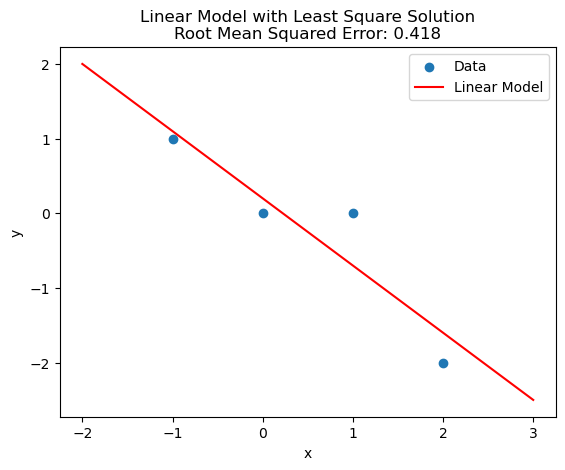

In [4]:
# AI usage: initial plotting block is doen with copilot

# Calculate the predicted values
y_pred = c[0] + c[1] * data[:, 0]

# Calculate the root mean squared error
rmse = np.sqrt(np.mean((data[:, 1] - y_pred)**2))

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], label='Data')

# Plot the linear model
x = np.linspace(-2, 3, 100)
y = c[0] + c[1] * x
plt.plot(x, y, color='red', label='Linear Model')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Linear Model with Least Square Solution\nRoot Mean Squared Error: {rmse:.3g}')

# Show legend
plt.legend()

# Show the plot
plt.show()

### Example 

Find the best **parabola** for the four data points $(-1,1), (0,0), (1,0), (2,-2) \\$
Steps/Approach:
1. Decide the model - parabola ($c_1 + c_2t + c_3t^2$)
2. Force the model to fit the data: Write $Ax = b$ (make sure to be clear about the settings)
3. Solve the normal equation

In [5]:
# data points
data = np.array([[-1, 1], [0, 0], [1,0], [2, -2]], dtype=np.float64)

# number of data points/observations
m = data.shape[0]

# vector of unknowns (model 2)
n = 3
c = np.zeros(n)

# matrix of least squares (model 2)
A = np.zeros((m, n))
A = np.column_stack((np.ones(m), data[:, 0], data[:, 0]**2))

# vector of observations
b = data[:, 1]

# least squares solution (model 2)
c = np.linalg.solve(A.T @ A, A.T @ b)

In [ ]:
# AI usage: initial plotting block is doen with copilot

# Calculate the predicted values
y_pred = c[0] + c[1] * data[:, 0] + c[2] * data[:, 0]**2

# Calculate the root mean squared error
rmse = np.sqrt(np.mean((data[:, 1] - y_pred)**2))

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], label='Data')

# Plot the parabola model
x = np.linspace(-2, 3, 100)
y = c[0] + c[1] * x + c[2] * x**2
plt.plot(x, y, color='green', label='Parabola Model')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Parabola Model with Least Square Solution\nRoot Mean Squared Error: {rmse:.3g}')

# Show legend
plt.legend()

# Show the plot
plt.show()

### Ex: Choosing nonlinear model functions 
Source: Sauer (2017) p. 209
Fit the recorded temperatures in Washington, D.C., on January 1, 2001, as listed in the following table, to a periodic model:

time of data t temp(C) $\\$
12 mid       0 -2.2 $\\$
3am 1/8 -2.8 $\\$
6am 1/4 -6.1 $\\$
9am 3/8 -3.9 $\\$
12 noon 1/2 0.0 $\\$
3pm 5/8 1.1 $\\$
6pm 3/4 -0.6 $\\$
9pm 7/8 -1.1 $\\$

Process:
1. Choose the model - $y = c_1 + c_2\text{cos}2\pi t + c_3\text{sin}2\pi t$
2. Force the model to fit the data: Write out $Ax = b$
3. Solve normal equation

In [7]:
# number of data points/observations
m = 8

# data 
temp = np.array([-2.2, -2.8, -6.1, -3.9, 0., 1.1, -0.6, -1.1])
t = np.arange(m)*(1./m)

# vector of unknowns (model 2)
n = 3
c = np.zeros(n)

# matrix of least squares (model 2)
A = np.column_stack((np.ones(m), np.cos(2.*np.pi*t), np.sin(2.*np.pi*t)))

# vector of observations
b = temp

# least squares solution (model 2)
c = np.linalg.solve(A.T @ A, A.T @ b)

In [ ]:
# AI usage: initial plotting block is doen with copilot

# Calculate the predicted values
y_pred = A @ c

# Calculate the root mean squared error
rmse = np.sqrt(np.mean((b - y_pred)**2))

# Plot the data points
plt.scatter(t, b, label='Data')

# Plot the model
x = np.linspace(0, 1, 100)
y = c[0] + c[1] * np.cos(2*np.pi*x) + c[2] *  np.sin(2*np.pi*x)
plt.plot(x, y, color='green', label='Periodic Model')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Periodic Model with Least Square Solution\nRoot Mean Squared Error: {rmse:.3g}')

# Show legend
plt.legend()

# Show the plot
plt.show()

### Example: Data Linearization
Source: Sauer (2017) p.212
Use model linearization to find the best least squares exponential fit $y = c_1e^{c_2t}$ to follow this automobile supply data:

year	cars ($\times 10^6$) $\\$
1950	53.05 $\\$
1955	73.04 $\\$
1960	98.31 $\\$
1965	139.78 $\\$
1970	193.48 $\\$
1975	260.20 $\\$
1980	320.39 $\\$

Process:
1. Take the transformation and relabel quantites appropriately: 
    * $\text{ln}y = \text{ln}\left(c_1e^{c_2t}\right) = \text{ln}c_1 + c_2t = k + c_2t$, where $k = \text{ln}c_1$
    * unknowns vector: $[k,c_2]$
2. Solve the normal equation
3. Check the result with $c_1 = e^k$ and $c_2$ in the setting before the transformation

In [9]:
# number of data points/observations
m = 7
y = np.array([53.05, 73.04, 98.31, 139.78, 193.48, 260.20, 320.39])
# 1950 is treated as 0
t = np.arange(m)*5.

# vector of unknowns
n = 2
c = np.zeros(n)

# matrix of least squares
A = np.column_stack((np.ones(m), t))

# vector of observations
b = np.log(y)

# least squares solution
c = np.linalg.solve(A.T @ A, A.T @ b)

# invert the transoformation for c_1
c[0] = np.exp(c[0])

In [ ]:
# AI usage: initial plotting block is doen with copilot

# Calculate the predicted values
y_pred = c[0]*np.exp(c[1]*t)

# Calculate the root mean squared error
rmse = np.sqrt(np.mean((b - y_pred)**2))

# Plot the data points
plt.scatter(t, y, label='Data')

# Plot the model
x = np.linspace(t[0], t[-1], 100)
y_ = c[0]*np.exp(c[1]*x)
plt.plot(x, y_, color='green', label='Exponential Model')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Car Population growth\n(Data linearized with log)')
plt.ylim(0, np.max(y)*1.1)

# Show legend
plt.legend()

# Show the plot
plt.show()

### Consequences of data linearization

* Model linearization changes the least squares problem - the solution minimizes the RMSE with respect to the linearized problem, not the original problem
* This means it minimizes some distorted distance, so there's uncertainity of whether it's the right quantity to minimize (correct thing to minimize depends on the context of the problem)

### Ex: Ill-conditioned least square problem
Let $x_0 = 2.0, x_1 = 2.2, \dots, x_{10} = 4.0$ be equally spaced points in [2,4], and set $y_i = 1 + x_i + x_i^2 + \dots + x_i^7$ for $0 \leq i \leq 10$. Use the normal equations to find the least squares polynomial $P(x) = c_1 + c_2x + \dots + c_8x^7$ fitting the $(x_i,y_i)$.

The process for the example is the same as examples prior, so we'll proceed with the computation.

In [ ]:
# problem parameters
# Suggestions: To check sanity, set n = 2, 3, 4, 
#   Things get wild soon after n = 5
n = 3       # number of unknowns

# right-hand side vector
x = np.linspace(2., 4., 11)
c_true = np.ones(n)
y = poly_eval(c_true, x) # function from Park's internal library

# matrix
pow = np.arange(n)
# A = x[:, np.newaxis] ** pow       # broadcasting in effect
A = x.reshape(-1, 1) ** pow         # equivalent to the previous line

# vector of unknowns
c = np.zeros(n)

# least squares solution (model 1 and 2)
c = np.linalg.solve(A.T @ A, A.T @ y)

In [ ]:
with np.printoptions(precision=2, suppress=True):
    print(f"{'c_true':<10}{': '}{c_true}")
    print(f"{'c':<10}{': '}{c}")
    print(f"{'x':<10}{': '}{x}")
    print(f"{'y':<10}{': '}{y}")

The ill-conditioned nature of this problem motivates the use of QR factorization for least squares solutions, which will provide a solution with better conditioning.